In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

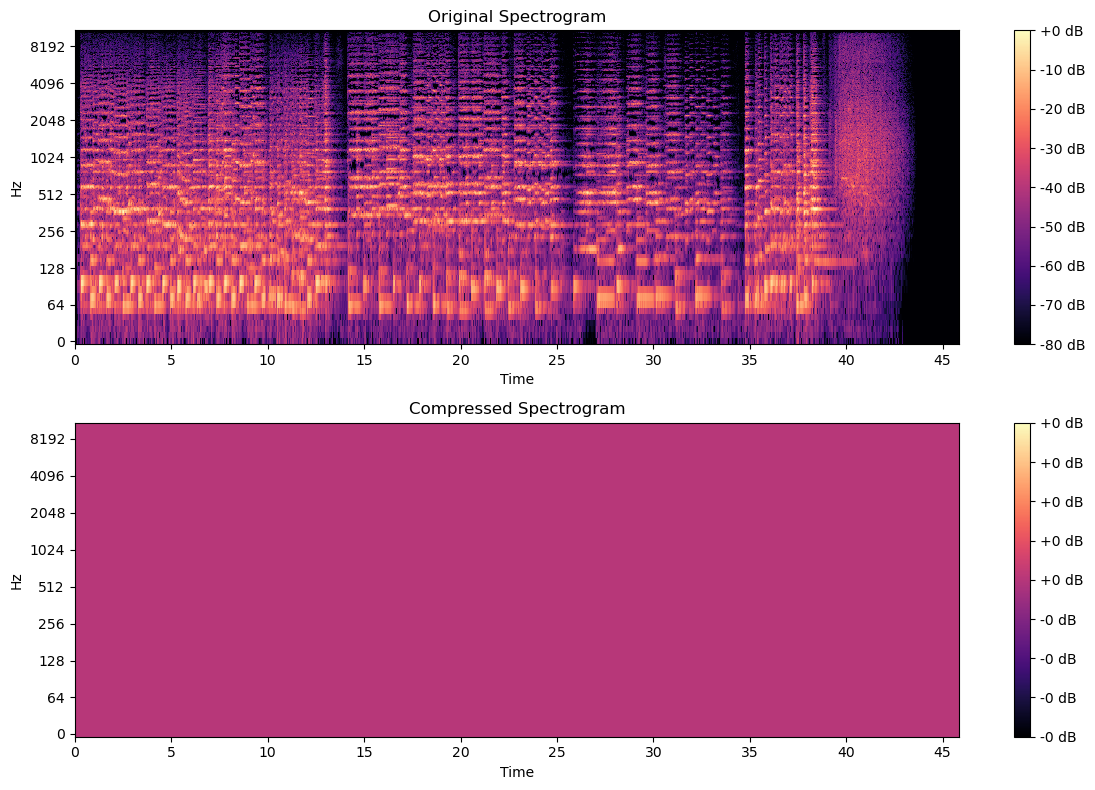

In [14]:
input_audio_file = librosa.example("brahms")

def apply_frequency_masking(spec, threshold=0.1):
    masked_spec = np.where(np.abs(spec) < threshold, 0, spec)
    return masked_spec

def apply_temporal_masking(signal, threshold=0.1):
    masked_signal = np.where(np.abs(signal) < threshold, 0, signal)
    return masked_signal

def audio_compression(input_file, frequency_masking_threshold=0.1, temporal_masking_threshold=0.1):
    # Load audio file
    y, sr = librosa.load(input_file)

    # Compute spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Apply frequency masking
    masked_spec = apply_frequency_masking(D, threshold=frequency_masking_threshold)

    # Inverse transform to get compressed audio
    compressed_audio = librosa.istft(librosa.db_to_amplitude(masked_spec))

    # Apply temporal masking
    masked_audio = apply_temporal_masking(compressed_audio, threshold=temporal_masking_threshold)

    # Plot original and compressed spectrograms
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title('Original Spectrogram')
    plt.colorbar(format='%+2.0f dB')

    plt.subplot(2, 1, 2)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(masked_audio)), ref=np.max),
                             sr=sr, x_axis='time', y_axis='log')
    plt.title('Compressed Spectrogram')
    plt.colorbar(format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

audio_compression(input_audio_file)
